# Advanced Topic Modeling: Part 1

Latent Dirichlet allocation (LDA), introduced in the context of text analysis in [2003](http://www.jmlr.org/papers/volume3/blei03a/blei03a.pdf), is an instance of a more general class of models called _mixed-membership models_. Involving a number of distributions and parameters, the topic model is typically performed using [Gibbs sampling](https://en.wikipedia.org/wiki/Gibbs_sampling) with conjugate priors and is purely based on word frequencies.

`dariah` provides two implementations of LDA:
- The lightweight, Cython-based package [lda](https://pypi.org/project/lda/)
- The more robust, Java-based package [MALLET](http://mallet.cs.umass.edu/topics.php)

The lightweight implementation is default when calling `dariah.topics()`. If you pass the path or the environment variable to its executable, a MALLET process is started under the hood, but the API remains the same:

```python
>>> dariah.topics(directory,
                  stopwords=100,
                  num_topics=10,
                  num_iterations=100,
                  mallet="mallet-2.0.8/bin/mallet")
```

However, this notebook introduces a more lower-level approach using MALLET for topic modeling.

In [1]:
from pathlib import Path

import dariah
import cophi

ModuleNotFoundError: No module named 'dariah'

## Preprocessing a corpus

First of all, set the path to your corpus:

In [2]:
directory = Path("data", "british-fiction-corpus")

and create a `Corpus` object, defining e.g. a custom regular expression for a token:

In [3]:
corpus = cophi.corpus(directory,
                      lowercase=True,
                      token_pattern=r"\p{Letter}+\p{Connector_Punctuation}?\p{Letter}+",
                      metadata=False)

To remove stopwords and hapax legomena from the corpus, you have to create a list of features:

In [4]:
mfw = corpus.mfw(50)
mfw[:10]

['the', 'and', 'to', 'of', 'in', 'he', 'that', 'was', 'his', 'it']

In [5]:
corpus.hapax[:10]

['abandons',
 'abase',
 'abased',
 'abasement',
 'abashment',
 'abate',
 'abatement',
 'abating',
 'abbreviated',
 'abby']

In [6]:
features = mfw + corpus.hapax

print(f"{len(features)} types will be removed from the corpus.")

13087 types will be removed from the corpus.


The corpus is represented as a document-term matrix with absolute word frequencies from which the features you selected above are dropped:

In [7]:
dtm = corpus.drop(corpus.dtm, features).fillna(0).astype(int)
dtm.iloc[:, :5]

,abandon,abandoned,abandoning,abandonment,abashed
fielding_tom,2,15,2,0,0
thackeray_lyndon,0,0,1,0,0
fielding_joseph,3,5,0,0,0
dickens_bleak,3,2,0,0,2
thackeray_vanity,0,10,0,0,3
trollope_prime,11,7,0,2,1
dickens_david,2,6,0,0,5
eliot_adam,1,0,1,0,0
eliot_mill,0,0,0,1,0
trollope_phineas,14,1,0,0,0


## Training a model

In [8]:
model = dariah.core.LDA(num_topics=10,
                        num_iterations=1000,
                        mallet="mallet-2.0.8/bin/mallet")
model

<Model: LDA, 10 topics, 1000 iterations, alpha=0.1, eta=0.01>

In [9]:
model.fit(dtm)

In [10]:
model.topics.iloc[:, :5]

,word0,word1,word2,word3,word4
topic0,phineas,lady,laura,lord,will
topic1,could,peggotty,upon,miss,has
topic2,miss,crawley,george,osborne,amelia
topic3,about,them,out,down,after
topic4,tom,adam,maggie,could,tulliver
topic5,now,are,more,like,think
topic6,man,should,could,think,lopez
topic7,man,lady,old,captain,young
topic8,their,jones,will,are,could
topic9,your,such,more,some,should


## Visualizing a model

In [11]:
vis = dariah.core.Vis(model)
vis

<Visualization: LDA, 10 topics, 1000 iterations, alpha=0.1, eta=0.01>

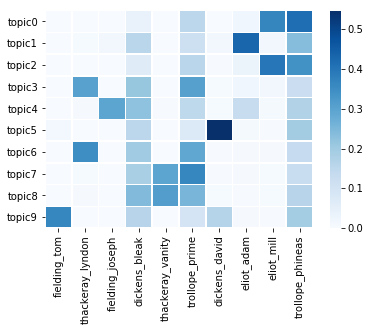

In [12]:
%matplotlib inline

vis.topic_document()

## Advanced topic modeling

Check out the other notebook for advanced topic modeling using part-of-speech tagging as preprocessing and using metadata to visualize the model.